In [14]:
# open the generated synthetic data file and read it as a python dictionary called data

import json
import emip_toolkit as EMTK

import correction

import numpy as np
import algorithms as algo
from tqdm import tqdm

import time

import matplotlib.pyplot as plt
import statistics

In [15]:
def load_emip_json_data(filename):
    file = open(filename, 'r')
    data = json.loads(file.read())
    data = list(data.values())
    return data

example_input = load_emip_json_data("example_data_input.json")
example_truth = load_emip_json_data("example_data_truth.json")
print(example_input[:5])

[[799.0872727, 312.1445455, 88.0], [850.9412121, 307.2460606, 132.0], [842.9616279, 302.7576744, 172.0], [883.1030769, 306.5711538, 208.0], [883.1030769, 306.5711538, 208.0]]


In [19]:
# find areas of interest (AOIs) once again
image_path = "./"
image = "example_data_image.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

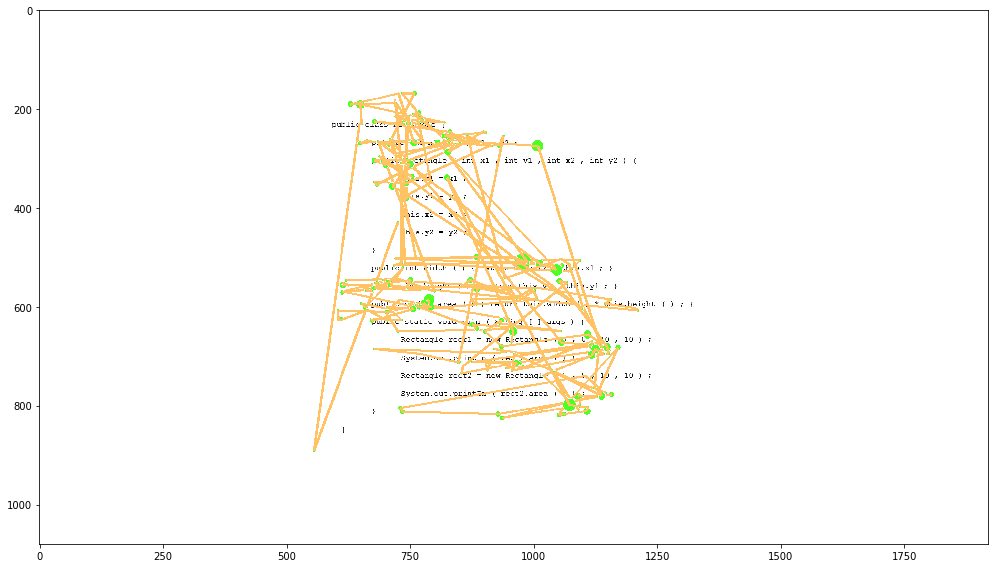

In [20]:
# draw original correct fixations
correction.draw_fixation(image, example_data.copy())

In [22]:
# generate noise over the correct trial

# PENDING NOISE GENERATION

def plot_raw_data_on_image():
    error_test = correction.error_noise(1, 30, 1, example_data.copy())

    # draw the trial with added error
    correction.draw_fixation(image, error_test)

In [23]:
# find the center of each word, we need this for warp, mode of disparities, etc.

def warp_correction_example():
    # warp correction
    np_array = np.array(error_test.copy(), dtype=int)
    durations = np.delete(np_array, 0, 1)
    durations = np.delete(durations, 0, 1)
    np_array = np.delete(np_array, 2, 1)

    # run warp
    warp_correction = algo.warp(np_array, word_centers)

    # this is a cool function that checks the quality of the correction
    percentage, match_list = correction.correction_quality(aoi, example_data.copy(), warp_correction)
    print(percentage)

    # this is a cool function that draws the correction in red if the algorithm made a mistake
    correction.draw_correction(image, warp_correction, match_list)

This concludes the example I wanted to show you of running an error generator, then correcting the data, then seeing how well the correction algorithm did.  You will need to repeat the same concept for a bunch of algorithms in the next section.

# Comparing algorithms with Noise error:

In this example, I show you one type of erro "Noise" you will implement all 5 types and add skipping to your assessment.  Also, the code below runs only 4 algorithms, you will add the remaining 6 algorithms to this assessment for each type of error. 

In [24]:
word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

In [31]:
# TODO: add back in  "chain"

algorithms = ["compare", "compare_line_len", "compare_fixnum", "attach", "cluster", "compare", "merge", "regress", "segment", "split", "stretch", "warp"]
algorithms_needs_word_center = ["compare", "compare_line_len", "compare_fixnum", "warp"]
algorithms_needs_aoi = []

# idea is to use this like:
#run_algorithms_on_data(real_data)
#run_algorithms_on_data(fake_data_error_prob0)
#run_algorithms_on_data(fake_data_error_prob1)

def run_algorithms_on_data(data_input, data_truth, verbose=True):
    '''
    
    data_input: what the algorithm sees
    data_truth: the ground truth that the algorithm is judged against
    
    '''
    
    results = {}

    for alg in algorithms:
        data_input_copy = np.array(data_input.copy())
        if alg in algorithms_needs_word_center:
            model_guess = getattr(algo, alg)(data_input_copy[:,:2], word_centers)
        else:
            model_guess = getattr(algo, alg)(data_input_copy, np.array(line_ys))

        percentage, match_list = correction.correction_quality(aoi, data_truth.copy(), model_guess)
        results[alg] = percentage

        if verbose:
            print(f"{alg} got {round(percentage * 100, 2)}% accuracy")

    return results

In [32]:
run_algorithms_on_data(example_input, example_truth)

compare got 7.04% accuracy
compare_line_len got 7.04% accuracy
compare_fixnum got 21.13% accuracy
attach got 73.94% accuracy
cluster got 9.15% accuracy
compare got 7.04% accuracy
merge got 2.11% accuracy
regress got 0.0% accuracy
segment got 12.68% accuracy
split got 65.49% accuracy
stretch got 0.0% accuracy
warp got 41.55% accuracy


{'compare': 0.07042253521126761,
 'compare_line_len': 0.07042253521126761,
 'compare_fixnum': 0.2112676056338028,
 'attach': 0.7394366197183099,
 'cluster': 0.09154929577464789,
 'merge': 0.02112676056338028,
 'regress': 0.0,
 'segment': 0.1267605633802817,
 'split': 0.6549295774647887,
 'stretch': 0.0,
 'warp': 0.4154929577464789}

In [ ]:
# OTHER CODE NOT CLEANED YET

In [ ]:
def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [ ]:
def plot_results(mean_results):
    
    
    
    markers = ".ov^<>1234"
    for i, alg in enumerate(algorithms):
        plt.plot(mean_results[alg], marker=markers[i]) # color='Black', linewidth=1, marker='^')

    plt.legend(algorithms)
    plt.ylabel('accuracy')
    plt.xlabel('noise')

    x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    plt.xticks(range(0, 11), x_ticks_labels)
    #plt.savefig("noise_comparison.png")
    plt.show()

    


In [ ]:
def noise_error(prob, data, robot_str):
    x = correction.error_noise(prob/10, 30, prob/10, data[robot_str].copy())
    return x

noise_results = run_error_on_algorithms(noise_error, data)


In [ ]:
noise_results

In [ ]:
mean_noise_results = {alg:mean_error_group(noise_results[alg]) for alg in algorithms}
plot_results(mean_noise_results)

In [ ]:
for alg in algorithms:
    print(f"mean {alg}:", statistics.mean(mean_results[alg]))